In [2]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import os

In [23]:
filename = '/home/juliame/metaphor/data/annotations_2024-10-07/agreement.tsv'
plots_dir = "/home/juliame/metaphor/results/plots"


In [3]:
df = pd.read_csv(filename,sep='\t')

In [5]:
df = df[df['ideology']=='all_annotators']

In [7]:
df = df.replace('overall','domain-agnostic')

In [9]:
all_concept_alpha = df[df['concept']=='all_documents']['alpha'][0]

In [10]:
df = df[df['concept'] != 'all_documents']

In [12]:
df = df.sort_values(by='alpha',ascending=False)

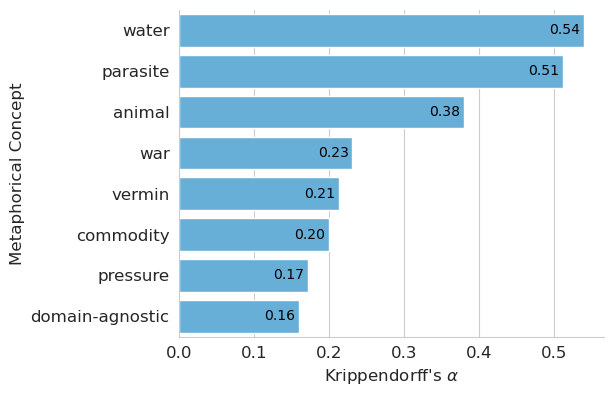

In [26]:
sns.set_style('whitegrid')
color = sns.color_palette('colorblind')[9]
g = sns.catplot(x='alpha',y='concept',data = df, kind='bar',aspect=1.5,height=4,color=color)
for container in g.ax.containers:
    g.ax.bar_label(container, fmt='%.2f', padding=-25,color='black',fontsize=10)
plt.ylabel("Metaphorical Concept",fontsize=12)
plt.xlabel(r"Krippendorff's $\alpha$",fontsize=12)
plt.xticks(size=12)
plt.yticks(size=12)
plt.savefig(os.path.join(plots_dir,'agreement_2024-10-07.pdf'),bbox_inches='tight')

In [4]:
sns.set_style('whitegrid')
df_model = df_model.sort_values(by='alpha',ascending=False)
df_sub = df_model[df_model['model'] == 'all_models']
df_sub = df_sub[df_sub['metaphor'] != 'all_metaphors']


df_sub = df_sub.rename(columns={'model':'Evaluation Sample'})
df_sub['Evaluation Sample'] = df_sub['Evaluation Sample'].apply(lambda x: x.upper())

color = sns.color_palette('colorblind')[9]
#order = df_sbert.sort_values(by='alpha',ascending=False)['metaphor'].tolist()
g = sns.catplot(x='alpha',y='metaphor',data=df_sub,kind='bar',
                aspect=1,legend=True,color=color)
for container in g.ax.containers:
    g.ax.bar_label(container, fmt='%.2f', padding=-30,color='black',fontsize=12)
plt.ylabel("Metaphorical Concept",fontsize=12)
plt.xlabel(r"Krippendorff's $\alpha$",fontsize=12)
plt.xticks(size=12)
plt.yticks(size=12)
plt.savefig(os.path.join(plots_dir,'agreement_full_sample.pdf'),bbox_inches='tight')

,concept,ideology,alpha
0,all_documents,all_annotators,0.316248
1,animal,all_annotators,0.380161
2,parasite,all_annotators,0.511692
3,vermin,all_annotators,0.213464
4,water,all_annotators,0.540205
5,war,all_annotators,0.231026
6,commodity,all_annotators,0.199978
7,pressure,all_annotators,0.171265
8,overall,all_annotators,0.159337
9,all_documents,Liberal,0.344532


# Label Distribution

In [3]:
df_annot = pd.read_csv('~/metaphor/data/annotations_2024-10-07/all_annotations_percent_metaphorical.tsv',sep='\t')

In [4]:
df_annot

,id_str,concept,No,Yes,total,percent_no,percent_yes
0,1000148310345289729,war,5.0,3.0,8.0,0.625000,0.375000
1,1000206422448062464,animal,10.0,2.0,12.0,0.833333,0.166667
2,1000225752724291584,war,2.0,4.0,6.0,0.333333,0.666667
3,1000237652396961792,commodity,8.0,1.0,9.0,0.888889,0.111111
4,1000471256674717696,commodity,8.0,0.0,8.0,1.000000,0.000000
...,...,...,...,...,...,...,...
1595,994580203178348544,vermin,5.0,1.0,6.0,0.833333,0.166667
1596,994702348437065728,vermin,8.0,0.0,8.0,1.000000,0.000000
1597,994975317134524417,war,2.0,6.0,8.0,0.250000,0.750000
1598,995392617209847808,war,5.0,1.0,6.0,0.833333,0.166667


In [6]:
df_annot['percent_yes'].describe()  

count    1600.000000
mean        0.347180
std         0.301452
min         0.000000
25%         0.111111
50%         0.285714
75%         0.555556
max         1.000000
Name: percent_yes, dtype: float64

In [12]:
df_annot[['concept','percent_yes']].groupby(by='concept').agg(['mean','median']).reset_index()

concept percent_yes          
                    mean    median
0     animal    0.311310  0.200000
1  commodity    0.406294  0.375000
2    overall    0.307046  0.250000
3   parasite    0.347351  0.200000
4   pressure    0.384889  0.333333
5     vermin    0.245518  0.166667
6        war    0.349619  0.285714
7      water    0.425417  0.354167

<Axes: xlabel='percent_yes', ylabel='Count'>

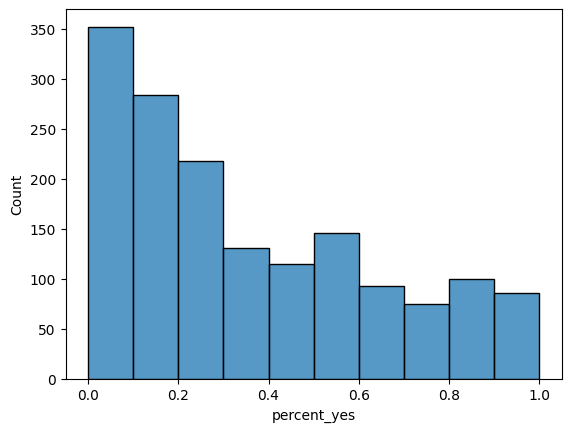

In [8]:
sns.histplot(x='percent_yes',data=df_annot,bins=10)

In [13]:
df_annot['total'].describe()

count    1600.000000
mean        7.922500
std         1.628466
min         3.000000
25%         7.000000
50%         8.000000
75%         9.000000
max        19.000000
Name: total, dtype: float64

<Axes: xlabel='total', ylabel='Count'>

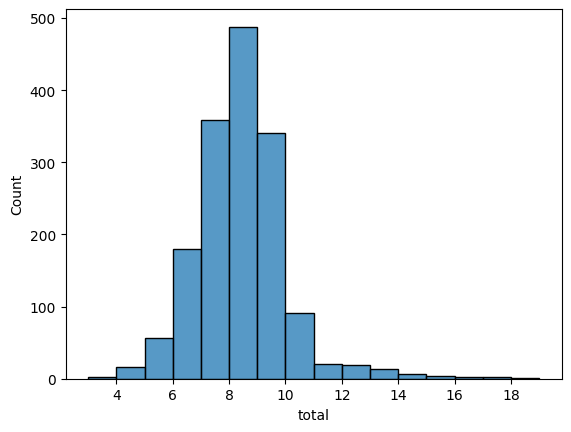

In [16]:
sns.histplot(x='total',data=df_annot,binwidth=1)

# Compare metaphor identification across ideologies of annotators

In [24]:
df = pd.read_csv('~/metaphor/data/counts_annotation_2024-10-07/label_counts.tsv',sep='\t')
#df = pd.read_csv('~/metaphor/data/counts_annotation_2024-10-07/label_proportion_tests_across_ideology.tsv',sep='\t')


In [23]:
df[df['p'] < .05]
# Difference in proportions show that the rate of metaphor identification is not sig diff for liberals/conservatives, but rather between
# moderates and both liberals and conservatives.

,concept,ideology1,ideology2,ztest,p
0,all_documents,Liberal,Moderate,-4.122971,3.740173e-05
2,all_documents,Conservative,Moderate,-3.937388,8.237343e-05
9,vermin,Liberal,Moderate,-6.250824,4.082930e-10
11,vermin,Conservative,Moderate,-4.528065,5.952614e-06
12,water,Liberal,Moderate,-2.068406,3.860188e-02
14,water,Conservative,Moderate,-2.533211,1.130228e-02
18,commodity,Liberal,Moderate,-3.727485,1.934003e-04
21,pressure,Liberal,Moderate,-2.859736,4.239937e-03
23,pressure,Conservative,Moderate,-3.287588,1.010498e-03


In [28]:
df[['concept','ideology','percent_metaphorical']].pivot(columns='ideology',index='concept',values='percent_metaphorical')

ideology,Conservative,Liberal,Moderate,all_annotators
concept,,,,
all_documents,0.326521,0.338376,0.377947,0.348769
animal,0.282282,0.311005,0.284615,0.298736
commodity,0.407080,0.371528,0.471223,0.410085
overall,0.293040,0.297071,0.331439,0.308300
parasite,0.361842,0.356917,0.349741,0.356139
pressure,0.318182,0.375367,0.461756,0.387548
vermin,0.144928,0.186441,0.341584,0.249821
war,0.344569,0.367978,0.334677,0.352542
water,0.379747,0.410292,0.470000,0.423453


In [29]:
df_all = pd.read_csv('~/metaphor/data/annotations_2024-10-07/all_annotations.tsv',sep='\t')


In [31]:
df_all['Duration (in seconds)'].describe()

count    12676.000000
mean       440.857368
std        290.608598
min        180.000000
25%        270.000000
50%        359.000000
75%        498.000000
max       2307.000000
Name: Duration (in seconds), dtype: float64

In [33]:
df_all['PROLIFIC_PID'].nunique()

617

In [38]:
df_all['Sex'].value_counts()

Sex
Female               7813
Male                 4824
Prefer not to say      39
Name: count, dtype: int64

In [39]:
df_all['Ideology'].value_counts()

Ideology
Liberal         6676
Moderate        3945
Conservative    2055
Name: count, dtype: int64

In [40]:
df_all['Age'].describe()

count    12676.000000
mean        38.477043
std         12.648132
min         18.000000
25%         29.000000
50%         36.000000
75%         47.000000
max         84.000000
Name: Age, dtype: float64

In [42]:
df_all['Duration (in seconds)']

0         258
1         267
2         335
3         369
4        1498
         ... 
12671     322
12672     215
12673     452
12674     249
12675     226
Name: Duration (in seconds), Length: 12676, dtype: int64

In [44]:
df_time = df_all[['PROLIFIC_PID','Duration (in seconds)']].groupby(by='PROLIFIC_PID').agg('mean')

In [45]:
df_time['hours'] = df_time['Duration (in seconds)'] / 3600

In [46]:
df_time['rate'] = 1.6 / df_time['hours']

In [48]:
df_time['rate'].describe() # Mean 16.44 per hour, median 15.87 per hour

count    617.000000
mean      16.439461
std        6.744201
min        2.496749
25%       11.497006
50%       15.867769
75%       21.254613
max       32.000000
Name: rate, dtype: float64